<a href="https://colab.research.google.com/github/Inesq/TechInt/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Mon Jul 29 19:19:29 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [0]:
print(X.shape, y.shape)

(5760, 60, 80, 3) (5760,)


(array([1.500e+01, 2.000e+00, 4.000e+00, 7.000e+00, 7.000e+00, 7.000e+00,
        6.000e+00, 1.900e+01, 2.200e+01, 1.900e+01, 2.000e+01, 2.100e+01,
        2.100e+01, 3.100e+01, 5.000e+01, 4.400e+01, 9.000e+01, 1.598e+03,
        2.700e+01, 3.200e+01, 3.300e+01, 4.600e+01, 4.500e+01, 4.500e+01,
        4.500e+01, 1.616e+03, 2.600e+01, 2.900e+01, 4.100e+01, 3.800e+01,
        3.900e+01, 3.100e+01, 1.582e+03, 2.400e+01, 6.000e+00, 1.600e+01,
        6.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
        9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 8.000e+00]),
 array([-1.4  , -1.344, -1.288, -1.232, -1.176, -1.12 , -1.064, -1.008,
        -0.952, -0.896, -0.84 , -0.784, -0.728, -0.672, -0.616, -0.56 ,
        -0.504, -0.448, -0.392, -0.336, -0.28 , -0.224, -0.168, -0.112,
        -0.056,  0.   ,  0.056,  0.112,  0.168,  0.224,  0.28 ,  0.336,
         0.392,  0.448,  0.504,  0.56 ,  0.616,  0.672,  0.728,  0.784,
         0.84 , 

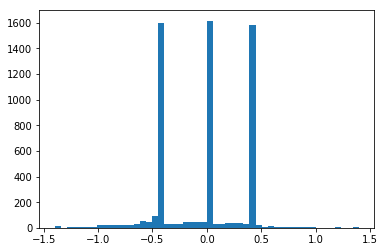

In [0]:
plt.hist(y, 50)

0.0


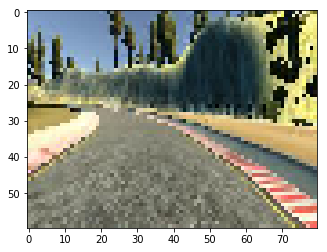

0.26


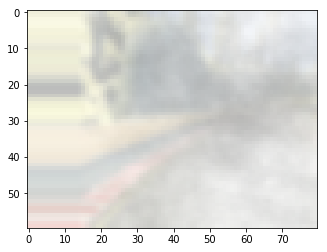

In [0]:
def augment(img, steering_angle):
  # Flip
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  # Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  # shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  # fog
  fog = iaa.Fog()
  img = fog.augment_image(img)
  # translate
  tx = random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx}, mode='edge')
  img = translater.augment_image(img)
  steering_angle += tx*0.02
  return img, steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(4608, 60, 80, 3) (4608,)
(1152, 60, 80, 3) (1152,)


In [0]:
Xgen=[]
ygen=[]
for i in range(X_train.shape[0]):
  img,angle = augment(X[i],y[i])
  Xgen.append(img)
  ygen.append(angle)
  
Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)

(4608, 60, 80, 3) (4608,)


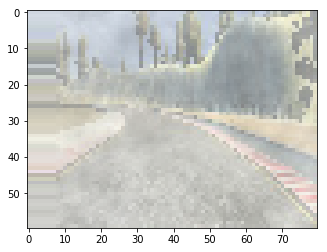

In [0]:
plt.imshow(Xgen[0])

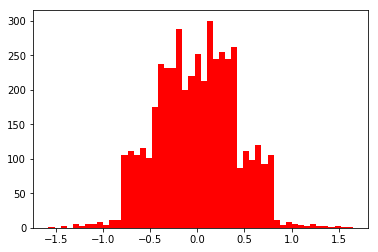

In [0]:
plt.hist(y_train, 50, facecolor='green');
plt.hist(ygen, 50, facecolor='red');